In [22]:

from main import get_dataset_positions

#obtener dataset de puntos
folder_path = r"C:\Users\Daniel_Arcos\Downloads\Matanza  251"
positions = get_dataset_positions(folder_path)



In [5]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering, SpectralClustering

#transformar en un formato apto para sklearn
X = np.array(positions)

#aplicar algoritmo de agrupamiento
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0.0008, linkage='single')
model.fit_predict(X)

for u in np.unique(model.labels_):
    print(f"Cluster {u}: {np.count_nonzero(model.labels_ == u)}")

Cluster 0: 904
Cluster 1: 108
Cluster 2: 250
Cluster 3: 26
Cluster 4: 443


[]

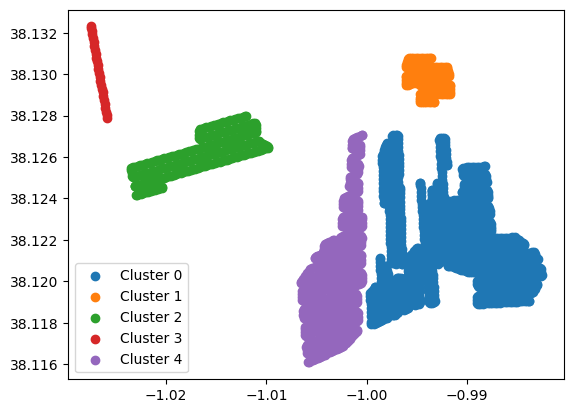

In [ ]:
import matplotlib.pyplot as plt
for u in np.unique(model.labels_):
    plt.scatter(X[model.labels_ == u, 0], X[model.labels_ == u, 1], marker='o', label=f"Cluster {u}")
plt.legend()
plt.plot()

In [25]:
cluster_i = 0
labeled = np.column_stack((X, model.labels_))
selected_cluster = labeled[labeled[:, -1] == cluster_i]

model_2=SpectralClustering(n_clusters=5, n_neighbors=10, affinity='nearest_neighbors')
model_2.fit_predict(selected_cluster[:, :2])

for u in np.unique(model_2.labels_):
    print(f"Cluster {u}: {np.count_nonzero(model_2.labels_ == u)}")

Cluster 0: 237
Cluster 1: 110
Cluster 2: 182
Cluster 3: 194
Cluster 4: 181


c:\Repos_\image_processing\venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


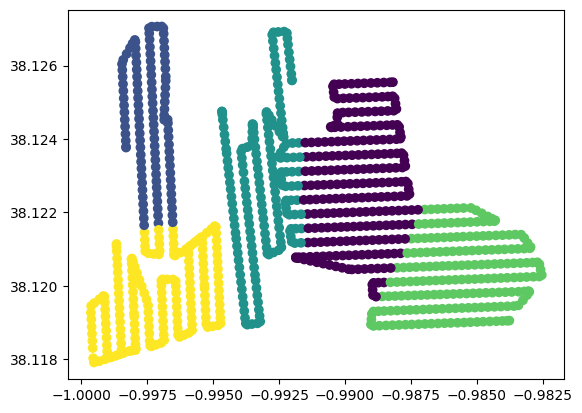

In [26]:
plt.scatter(selected_cluster[:, 0], selected_cluster[:, 1], marker='o', c=model_2.labels_)

In [18]:
import numpy as np
metros = 80
latitud = 40.0  # Por ejemplo, Madrid

# Conversión a grados
grados_lat = metros / 111320
grados_lon = metros / (111320 * np.cos(np.radians(latitud)))

print("500 metros ≈", grados_lat, "grados de latitud")
print("500 metros ≈", grados_lon, "grados de longitud en latitud 40°")

500 metros ≈ 0.0007186489399928135 grados de latitud
500 metros ≈ 0.0009381295647375341 grados de longitud en latitud 40°


In [20]:
import clustering
max_images = 200

out_clusters = clustering.full_clustering(positions, distance_threshold=0.0008, max_images=max_images)

Cluster 0.0: 5 splits
	Cluster 5.0: 194
	Cluster 6.0: 110
	Cluster 7.0: 182
	Cluster 8.0: 237
	Cluster 9.0: 181
Cluster 2.0: 2 splits
	Cluster 10.0: 148
	Cluster 11.0: 102
Cluster 4.0: 3 splits
	Cluster 12.0: 222
	Cluster 13.0: 167
	Cluster 14.0: 54


c:\Repos_\image_processing\venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


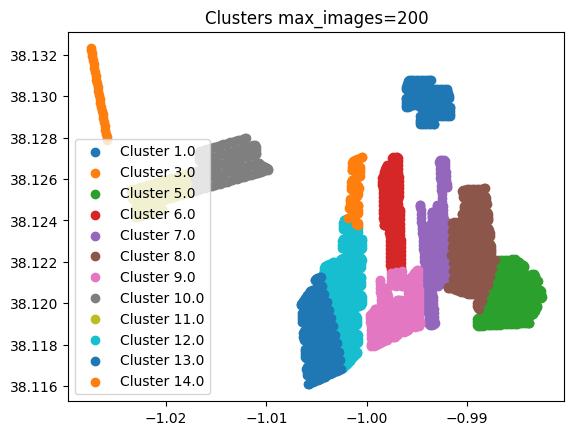

In [21]:
import matplotlib.pyplot as plt
plt.title(f"Clusters max_images={max_images}")
clustering.plot_map(out_clusters[:, :2], out_clusters[:, 2])